In [1]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = "/Users/daniel.martinezcarre/Desktop/Clase/IA/Programacion de IA/datos/"

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

filename = data_dir + "ETH-USD.csv"
filename

'/Users/daniel.martinezcarre/Desktop/Clase/IA/Programacion de IA/datos/ETH-USD.csv'

In [9]:
df = pd.read_csv(filename,
                 parse_dates=["Date"],   # Para parsear la fecha
                 usecols=['Date', 'Open', 'Volume'],
                 index_col= "Date")
df.head()

,Open,Volume
Date,,
2017-11-09,308.644989,893249984
2017-11-10,320.670990,885985984
2017-11-11,298.585999,842300992
2017-11-12,314.690002,1613479936
2017-11-13,307.024994,1041889984


> Es muy recomendable poner como **index** la **fecha** para realizar consulas entre fechas

In [11]:
fecha_min = datetime.datetime(year=2017, month=1, day=1)
df = df.loc[df.index > fecha_min]
df

,Open,Volume
Date,,
2017-11-09,308.644989,893249984
2017-11-10,320.670990,885985984
2017-11-11,298.585999,842300992
2017-11-12,314.690002,1613479936
2017-11-13,307.024994,1041889984
...,...,...
2022-03-21,2860.103271,15206116098
2022-03-22,2897.774170,16830539230
2022-03-23,2973.145020,16008767658


Se divide la columna de volume por 1M

In [12]:
df["Volume"] = df["Volume"] / 1000000
df

,Open,Volume
Date,,
2017-11-09,308.644989,893.249984
2017-11-10,320.670990,885.985984
2017-11-11,298.585999,842.300992
2017-11-12,314.690002,1613.479936
2017-11-13,307.024994,1041.889984
...,...,...
2022-03-21,2860.103271,15206.116098
2022-03-22,2897.774170,16830.539230
2022-03-23,2973.145020,16008.767658


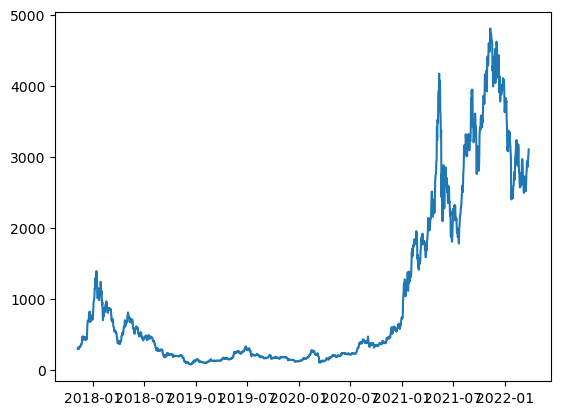

In [14]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Open"])

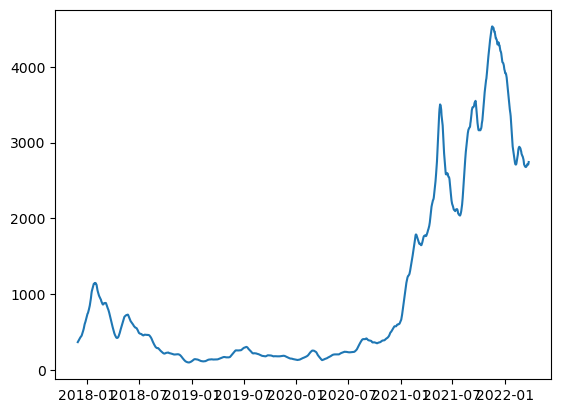

In [15]:
df = df.rolling(20).mean()
df = df.dropna()
fig, ax = plt.subplots()
ax.plot(df.index, df["Open"])

C:\Users\daniel.martinezcarre\AppData\Local\Temp\ipykernel_16000\45737973.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


[Text(17532.0, 0, '2017-11-28 00:00:00'),
 Text(17713.0, 0, '2017-11-29 00:00:00'),
 Text(17897.0, 0, '2017-11-30 00:00:00'),
 Text(18078.0, 0, '2017-12-01 00:00:00'),
 Text(18262.0, 0, '2017-12-02 00:00:00'),
 Text(18444.0, 0, '2017-12-03 00:00:00'),
 Text(18628.0, 0, '2017-12-04 00:00:00'),
 Text(18809.0, 0, '2017-12-05 00:00:00'),
 Text(18993.0, 0, '2017-12-06 00:00:00')]

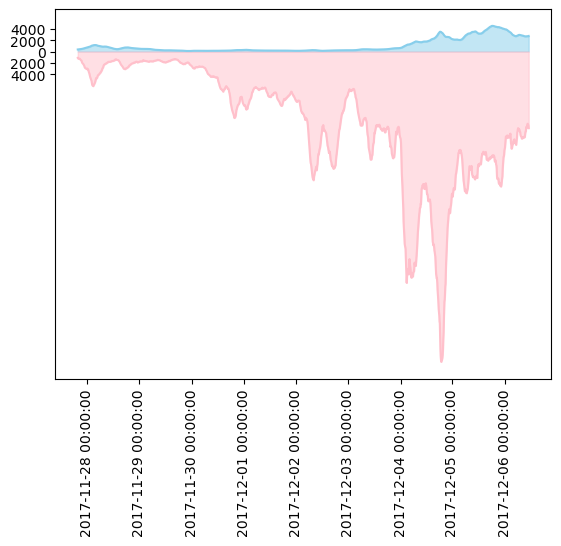

In [24]:

fig, ax = plt.subplots()
ax.plot(df.index, df["Open"], label="Valor Open", color = "skyblue")
ax.plot(df.index, -df["Volume"], label="Volumen (en Millones)", color = "pink")
plt.fill_between(df.index, df["Open"], alpha=0.5, color = "skyblue")
plt.fill_between(df.index, -df["Volume"], alpha=0.5, color = "pink")
ax.set_yticks([-4000, -2000, 0, 2000, 4000])
ax.set_yticklabels([4000, 2000, 0, 2000, 4000])
ax.set_xticklabels(df.index, rotation=90)